배달앱 데이터

출처 : 데이콘 포스트 코로나 데이터 시각화 경진대회 (<https://www.dacon.io/competitions/official/235618/overview/>)

## 필요한 모듈 import

In [74]:
# 함수 관련
import numpy as np
import pandas as pd
from IPython.display import Image

import warnings
warnings.filterwarnings(action='ignore')

In [75]:
# 그래프 관련
import matplotlib.pyplot as plt
import plotly.express as px

import plotly.io as pio
pio.renderers.default = "notebook_connected"

import plotly.graph_objs as go

import plotly.offline as pyo
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

In [84]:
import plotly
from plotly import tools

In [76]:
# 폰트 설정
import os
plt.rcParams['font.family'] = 'AppleGothic'

## 데이터 불러오기

### 데이터 큰 전처리

In [72]:
delivery = pd.read_csv("delivery.csv") 

> 사용할 데이터 열
 - PROCESS_DT : 처리일시
 - DLVR_STORE_ID : 배달상점ID
 - DLVR_RCEPT_CMPNY_ID : 배달접수회사ID
 - DLVR_STORE_INDUTY_NM : 배달상점 업종이름
 - DLVR_STORE_SIDO : 배달상점 주소 시도명
 - DLVR_STORE_SIGUNGU : 배달상점 주소 시군구명
 - DLVR_DSTN_SIDO : 배달목적지 주소 법정동 시도명
 - GOODS_AMOUNT : 배달상품금액
 - SETLE_KND_VALUE : 결제종류번호 (1:카드, 2:선불, 3:현금)
 - DLVR_RCEPT_TIME : 배달접수시간

In [79]:
# 우리가 사용할 컬럼 추출
col = ["PROCESS_DT", "DLVR_STORE_ID", "DLVR_RCEPT_CMPNY_ID","DLVR_STORE_INDUTY_NM",
       "DLVR_STORE_SIDO","DLVR_STORE_SIGUNGU","DLVR_DSTN_SIDO","GOODS_AMOUNT",
       "SETLE_KND_VALUE","DLVR_RCEPT_TIME"]
del_df = delivery.loc[:,col]

### 날짜 및 시간 전처리

In [80]:
# 날짜 타입 변경 및 년도, 월 열 추가하기
del_df["PROCESS_DT"] = pd.to_datetime(del_df["PROCESS_DT"], format='%Y-%m-%d')
del_df['year'] = pd.DatetimeIndex(del_df['PROCESS_DT']).year
del_df['month'] = pd.DatetimeIndex(del_df['PROCESS_DT']).month

In [81]:
del_df["PROCESS_DT"]

0         2020-01-01
1         2020-01-01
2         2020-01-01
3         2020-01-01
4         2020-01-01
             ...    
5158319   2020-06-21
5158320   2020-06-21
5158321   2020-06-21
5158322   2020-06-21
5158323   2020-06-21
Name: PROCESS_DT, Length: 5158324, dtype: datetime64[ns]

배달앱의 데이터는 2020-01-01 부터 2020-06-21의 데이터를 담고 있음

## 데이터 분석

### 배달 산업 현황 분석

포스트 코로나의 언택트 문화 확산으로 인해 배달 산업의 성장이 예상됨

#### 배달 건수에 대한 분석

In [82]:
# 날짜별 총 배달 건수 합
del_date = del_df.groupby("PROCESS_DT").size().reset_index(name="count")

# datetime형으로 변환해주기
del_date["PROCESS_DT"] = pd.to_datetime(del_date["PROCESS_DT"], format = '%Y-%m-%d')

In [83]:
# 월별 건수를 보자면
del_month = del_df.groupby("month").size().reset_index(name="count")
del_month

,month,count
0,1,824058
1,2,895861
2,3,971131
3,4,967309
4,5,1023593
5,6,476372


1월부터 5월까지 늘어가는 추세를 파악할 수 있다.

6월의 경우 마지막 1주 이상이 제외되었기 때문에, 불균형하다고 판단됨

In [87]:
# 일별 배달 건수 그래프
ax1 = go.Scatter(
    x = del_date["PROCESS_DT"],
    y = del_date['count'],
    name = "일별 배달 건수",
    mode = "lines",
    marker = dict(size=3, line=dict(width=1), color="darkgreen")
)

# 월별 배달 건수 그래프
ax2 = go.Scatter(
    x = del_month["month"],
    y = del_month['count'],
    name = "월별 배달 건수",
    mode = "lines",
    marker = dict(size=3, line=dict(width=1), color="navy")
)

# subplot
fig = tools.make_subplots(rows=2, cols=1, subplot_titles=("일별 배달 건수 변화", "월별 배달 건수 변화"))
fig.append_trace(ax1, 1, 1)
fig.append_trace(ax2, 2, 1)

# 그래프 설명들 추가해주기
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_yaxes(title_text="배달 건수")

# 전체적인 layout
fig["layout"].update(height=800, width = 800, title = "Date/Month 별 배달 건수 변화 그래프")

plotly.offline.iplot(fig)

/Users/yeonsu/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



일/월 모두 코로나가 시작된 1월 말 / 2월 초 부터 상승곡선의 형태를 보여주고 있음

    - 1월 26에 갑작스런 하락세는 설날(공휴일)이기 때문

    - 1월 6일은 왜 갑자기 치고 올라가는걸까

    => 이런건 예측할 때 뺴는 것이 나은가?

(불완전 데이터인 6월 합계 배달 건수 제외)

따라서 이후에도 배달 건수는 많아질 것으로 예측하며, Prophet을 통해 간단히 배달 건수를 예측해보고자 한다

#### 배달 건수에 대한 예측

In [88]:
# 페이스북에서 제공하는 Prophet 라이브러리 사용
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [89]:
# 예측이 가능하도록 Dataframe col 이름 변형해 만들어주기
forecast_df = del_date.rename(columns = {"PROCESS_DT":"ds", "count":"y"})
forecast_df

,ds,y
0,2020-01-01,30853
1,2020-01-02,21838
2,2020-01-03,25928
3,2020-01-04,30015
4,2020-01-05,31234
...,...,...
160,2020-06-10,34133
161,2020-06-11,31344
162,2020-06-12,36273
163,2020-06-20,41880


In [90]:
# 원래 우리가 가지고 있는 데이터 fit 시켜주기
prop = Prophet()
prop.fit(forecast_df) 

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [93]:
# 현재 데이터 이후 8월까지의 배달 건수를 예측을 위해 71일 추가
aug = prop.make_future_dataframe(periods=71)
aug

,ds
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
231,2020-08-27
232,2020-08-28
233,2020-08-29
234,2020-08-30


In [94]:
# 8월까지 예측
to_aug = prop.predict(aug)
to_aug

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,26990.857806,19915.222689,28290.914526,26990.857806,26990.857806,-2991.988850,-2991.988850,-2991.988850,-2991.988850,-2991.988850,-2991.988850,0.0,0.0,0.0,23998.868956
1,2020-01-02,27047.272948,19818.533290,28229.718457,27047.272948,27047.272948,-3058.043908,-3058.043908,-3058.043908,-3058.043908,-3058.043908,-3058.043908,0.0,0.0,0.0,23989.229040
2,2020-01-03,27103.688090,23954.902462,32523.260942,27103.688090,27103.688090,1195.192264,1195.192264,1195.192264,1195.192264,1195.192264,1195.192264,0.0,0.0,0.0,28298.880353
3,2020-01-04,27160.103231,28368.241966,36801.166859,27160.103231,27160.103231,5484.458183,5484.458183,5484.458183,5484.458183,5484.458183,5484.458183,0.0,0.0,0.0,32644.561414
4,2020-01-05,27216.518373,29587.166404,38105.301925,27216.518373,27216.518373,6460.553203,6460.553203,6460.553203,6460.553203,6460.553203,6460.553203,0.0,0.0,0.0,33677.071576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2020-08-27,38103.153040,30619.482286,39262.954346,37992.927950,38208.297344,-3058.043908,-3058.043908,-3058.043908,-3058.043908,-3058.043908,-3058.043908,0.0,0.0,0.0,35045.109132
232,2020-08-28,38146.472204,34912.470386,43820.101687,38033.921193,38254.549968,1195.192264,1195.192264,1195.192264,1195.192264,1195.192264,1195.192264,0.0,0.0,0.0,39341.664468
233,2020-08-29,38189.791368,39388.514725,48082.323385,38074.967186,38300.403777,5484.458183,5484.458183,5484.458183,5484.458183,5484.458183,5484.458183,0.0,0.0,0.0,43674.249551
234,2020-08-30,38233.110533,40508.273576,49115.064724,38115.278619,38346.134561,6460.553203,6460.553203,6460.553203,6460.553203,6460.553203,6460.553203,0.0,0.0,0.0,44693.663736


[ 일별 배달 건수 시각화 및 8월까지의 배달 건수 예측 ]


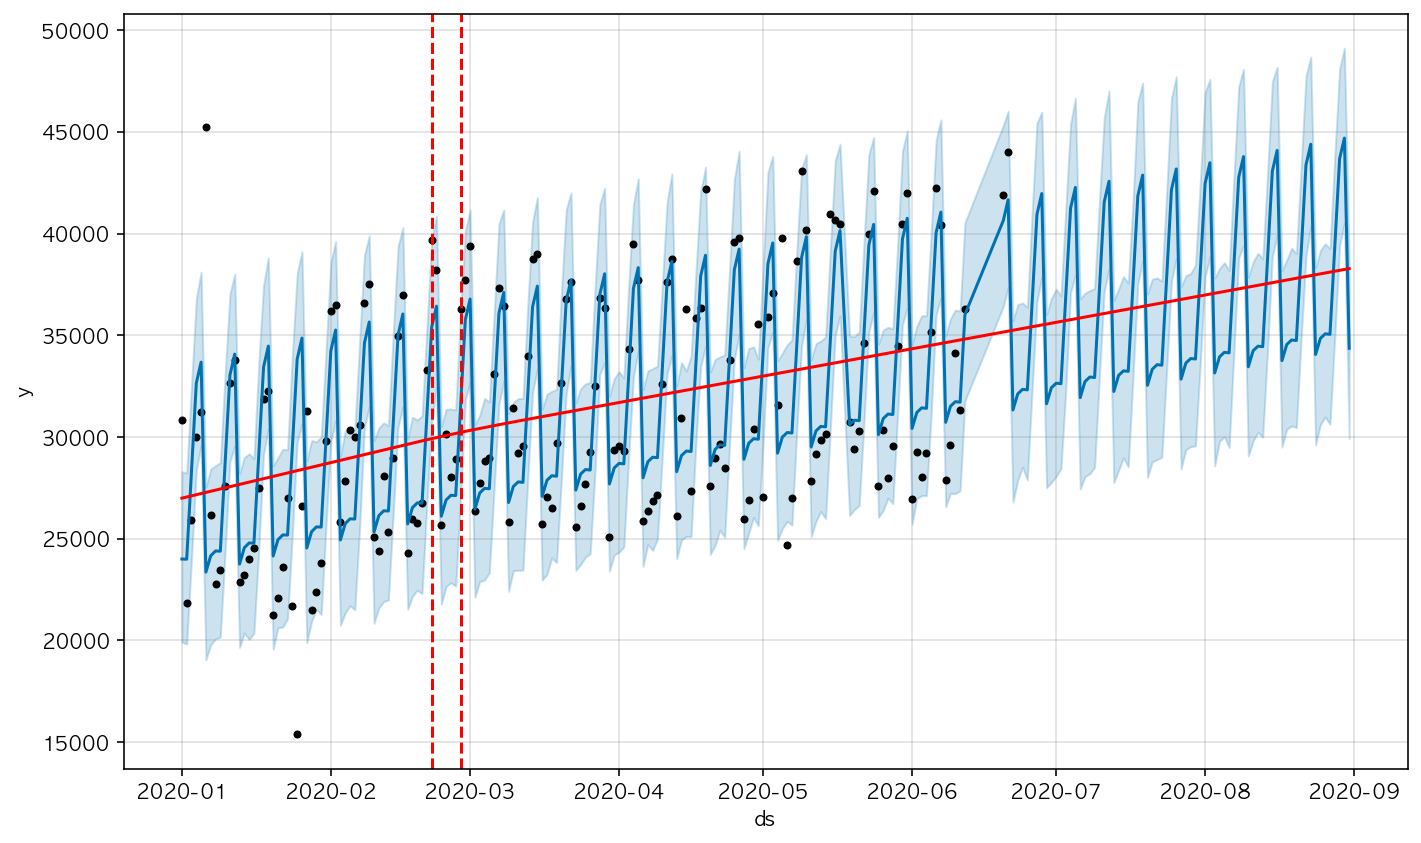

In [100]:
# 예측한 것 그래프로 나타내기
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

fig1 = prop.plot(to_aug)
graph = add_changepoints_to_plot(fig1.gca(), prop, to_aug         )
print("[ 일별 배달 건수 시각화 및 8월까지의 배달 건수 예측 ]")

- 배달 건수가 뚜렷하게 상승하고 있으며, 이후 8월까지도 상승할 것으로 예측이 되는 바이다.
- 1달에 4번 간격으로 업다운이 있는 것은 주 단위로 반복되는 추세로 파악된다.

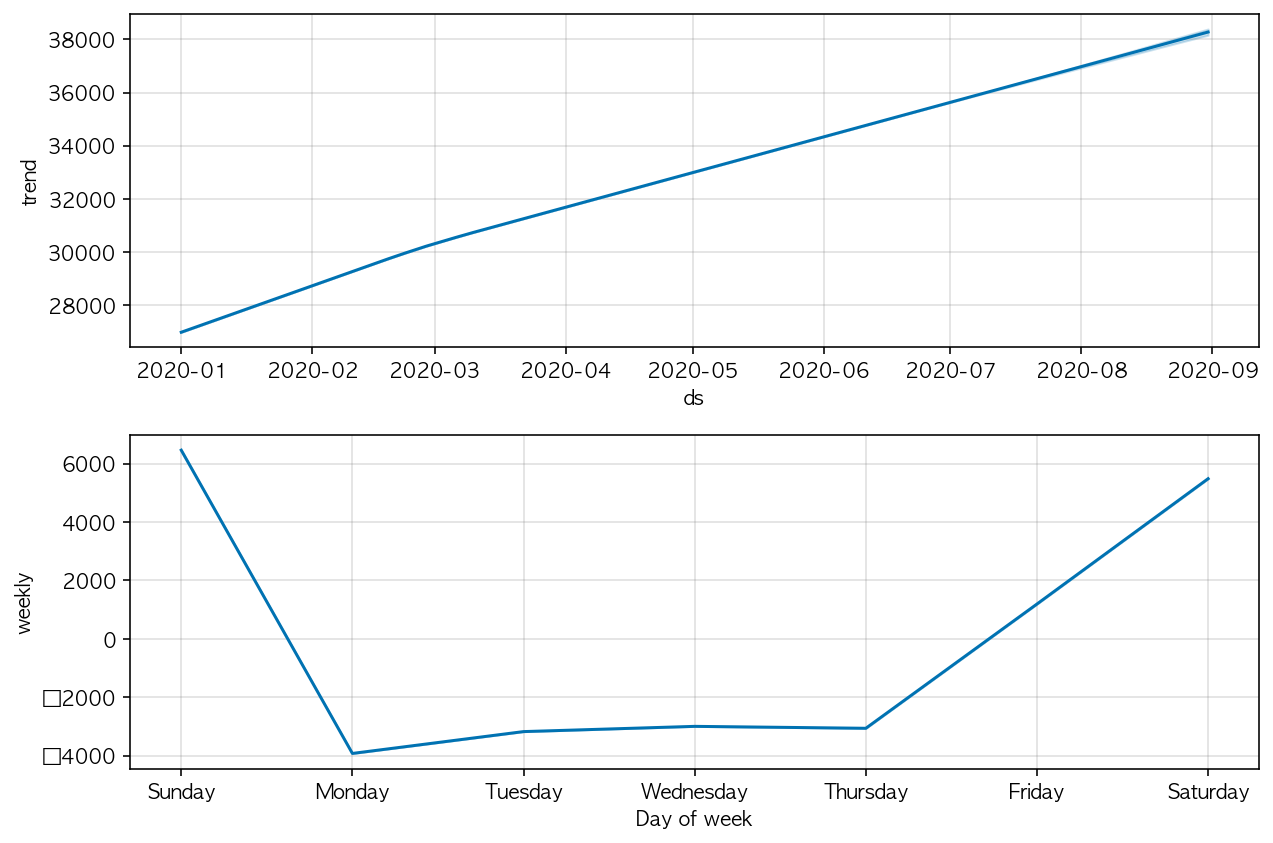

In [102]:
# 월별, 요일별 trend 및 예측
fig2 = prop.plot_components(to_aug)

- 월별 소비량으로 보아도 (코로나 지속시) 배달 수요는 꾸준히 증가할 것으로 예상할 수 있음
- 평균적으로 가장 낮은 배달량을 보이는 것은 월요일 / 주말의 배달량이 굉장히 높은 편

#### 배달 시간대별 분석

> 시간대 분류 기준
- 오전 : 5시 - 11시
- 점심 : 11시 - 5시
- 저녁 : 17시 - 23시
- 야식 : 23시 - 5시

In [141]:
# 배달 접수 시간의 Hour을 뽑기
del_df["DLVR_RCEPT_TIME"] = pd.to_datetime(del_df["DLVR_RCEPT_TIME"])
del_df["hour"] = pd.DatetimeIndex(del_df["DLVR_RCEPT_TIME"]).hour

In [148]:
del_df.hour.unique()

array([ 0,  1, 10, 11,  2,  9,  3,  4,  8,  6,  7,  5, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [143]:
# 시간대별 분류해 오전/점심/저녁/새벽 구분해주기

am = del_df.query('5<=hour<11').index
lunch = del_df.query('11<=hour<17').index
dinner = del_df.query('17<=hour<23').index
night = del_df.query("23<=hour<24 or 0<=hour<5").index

del_df["시간대"] = 0
del_df.loc[am, "시간대"] = '오전'
del_df.loc[lunch, "시간대"] = '점심'
del_df.loc[dinner, "시간대"] = '저녁'
del_df.loc[night, "시간대"] = '야식'

In [144]:
del_df.groupby("시간대").size().reset_index(name="count").sort_values(by="count")

,시간대,count
1,오전,97093
0,야식,323439
3,점심,1669496
2,저녁,3068296


-  배달 건수로 보자면, 저녁 > 점심 > 야식 > 오전 순서
- 재택근무나 사회적 거리두기로 인해 오전, 점심이 커질 것으로 예상했는데 절대량은 아직 저녁이 가장 우세

월별로 시간대 별 배달 건수에 변화가 있는지 살펴보자

In [140]:
# 시간대별 df 생성해주기
del_am = del_df.loc[am]
del_lunch = del_df.loc[lunch]
del_dinner = del_df.loc[dinner]
del_night = del_df.loc[night]

In [146]:
# 시간대별 배달 건수 집계해주기
del_am = del_am.groupby("month", as_index=False).size().reset_index(name="count")
del_lunch = del_lunch.groupby("month", as_index=False).size().reset_index(name="count")
del_dinner = del_dinner.groupby("month", as_index=False).size().reset_index(name="count")
del_night = del_night.groupby("month", as_index=False).size().reset_index(name="count")

In [164]:
del_am

,month,count
0,1,12511
1,2,15273
2,3,17522
3,4,19791
4,5,21885
5,6,10111


In [149]:
# 오전 배달 추이 그래프
ax3 = go.Bar(x=del_am["month"],
            y=del_am["count"],
            name="아침",
            marker_color="red",
            marker_line_color="brown",
            marker_line_width=0.6,
            )

# 점심 배달 추이 그래프
ax4 = go.Bar(x=del_lunch["month"],
            y=del_lunch["count"],
            name="점심",
            marker_color="darkgreen",
            marker_line_color="brown",
            marker_line_width=0.6,
            )

# 저녁 배달 추이 그래프
ax5 = go.Bar(x=del_dinner["month"],
            y=del_dinner["count"],
            name="저녁",
            marker_color="navy",
            marker_line_color="brown",
            marker_line_width=0.6,
            )

# 야식 배달 추이 그래프
ax6 = go.Bar(x=del_night["month"],
            y=del_night["count"],
            name="야식",
            marker_color="purple",
            marker_line_color="brown",
            marker_line_width=0.6,
            )

# subplot으로 한번에 그려주기
fig = tools.make_subplots(rows=1, cols=1, subplot_titles="시간대별 배달건수의 월별 변화량")
fig.append_trace(ax3, 1, 1)
fig.append_trace(ax4, 1, 1)
fig.append_trace(ax5, 1, 1)
fig.append_trace(ax6, 1, 1)

# 설명 추가
fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_yaxes(title_text="배달건수", row=1, col=1)

fig['layout'].update(height=600, width=1000)

plotly.offline.iplot(fig)

/Users/yeonsu/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



- 큰 성장을 보이는 점심, 저녁
- 이에 비해 오전과 야식의 경우 많은 증가를 보이지는 않았다

In [171]:
# 1월 대비 5월의 증감량

timezones = [del_am, del_lunch, del_dinner, del_night]
times = ["아침", "점심", "저녁", "야식"]
i=1

print("1월 대비 5월의 배달 건수 시간대별 증감량")
print(" ")
print("===============================")

for time, timezone in zip(times, timezones):
    change = (timezone.loc[4,"count"] - timezone.loc[0,"count"])/timezone.loc[0,"count"]*100
    print("{0}) {1} 증감량 : {2}".format(i, time, change))
    i += 1

print("===============================")

1월 대비 5월의 배달 건수 시간대별 증감량
 
1) 아침 증감량 : 74.92606506274478
2) 점심 증감량 : 32.66166071868318
3) 저녁 증감량 : 20.785760361232057
4) 야식 증감량 : 5.850296790636842


- 한가지 주목 할 만한 사실

절대적인 양 크기와는 별개로 증감량의 경우 1월(코로나 이전) 대비 5월(코로나 이후)

=> 아침 > 점심 > 저녁 > 야식 순서로 많이 증가하였음을 알 수 있다

이는 평소 배달음식이라는 인식이 저녁과 야식에 집중되어있었던 반면

코로나로 인한 언택트 문화와 재택근무 등 새로운 일상이 시작되면서 배달의 아침과 점심의 수요가 많이 늘어가게 된 것으로 파악되는 바이다.

    따라서 배달 건수가 증가한 이유에는 배달 산업 자체의 확장 (코로나 이전에도 배달 산업은 성장하고 있었으므로)도 있지만, 코로나로 인한 뉴노멀의 현상이 지배적이라는 것이라고 주장하는 바이다.

#### 배달 서비스 점포 수 분석

그렇다면 배달 건수가 늘은 만큼 배달 서비스를 제공하고자 하는 점포들의 수도 증가하였을까?

In [182]:
# 배달 호출을 한 업체가 하루에 몇 개
del_store = del_df.groupby("PROCESS_DT")["DLVR_STORE_ID"].nunique().reset_index(name="num_of_stores")
del_store

,PROCESS_DT,num_of_stores
0,2020-01-01,2365
1,2020-01-02,2618
2,2020-01-03,2727
3,2020-01-04,2793
4,2020-01-05,2550
...,...,...
160,2020-06-10,3496
161,2020-06-11,3332
162,2020-06-12,3468
163,2020-06-20,3523


In [185]:
fig = px.line(del_store, x = "PROCESS_DT", y = "num_of_stores")
fig.update_layout(
    title = {
        "text" : "일별 배달 서비스 제공 점포 수"
    }
)
fig.show()

- 설날인 1월 25일을 제외하고는 배달 서비스 제공 업체 수 역시 일정 주기를 가지고 증가하는 추세를 보인다

#### 배달 서비스 점포 수 예측

In [189]:
# prophet 사용할 수 있게 데이터 프레임 재설정
now_store = del_store.rename(columns = {"PROCESS_DT" : "ds", "num_of_stores" : "y"})

In [190]:
prop = Prophet(growth="linear")
prop.fit(now_store)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [191]:
# 미래 상점 개수 데이터 프레임 모양 생성
future_store = prop.make_future_dataframe(periods = 71)
future_store

,ds
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
231,2020-08-27
232,2020-08-28
233,2020-08-29
234,2020-08-30


In [192]:
# 배달 서비스 제공 상점 수 예측
forecast_store = prop.predict(future_store)

8월까지의 배달 서비스 제공 상점 수 예측


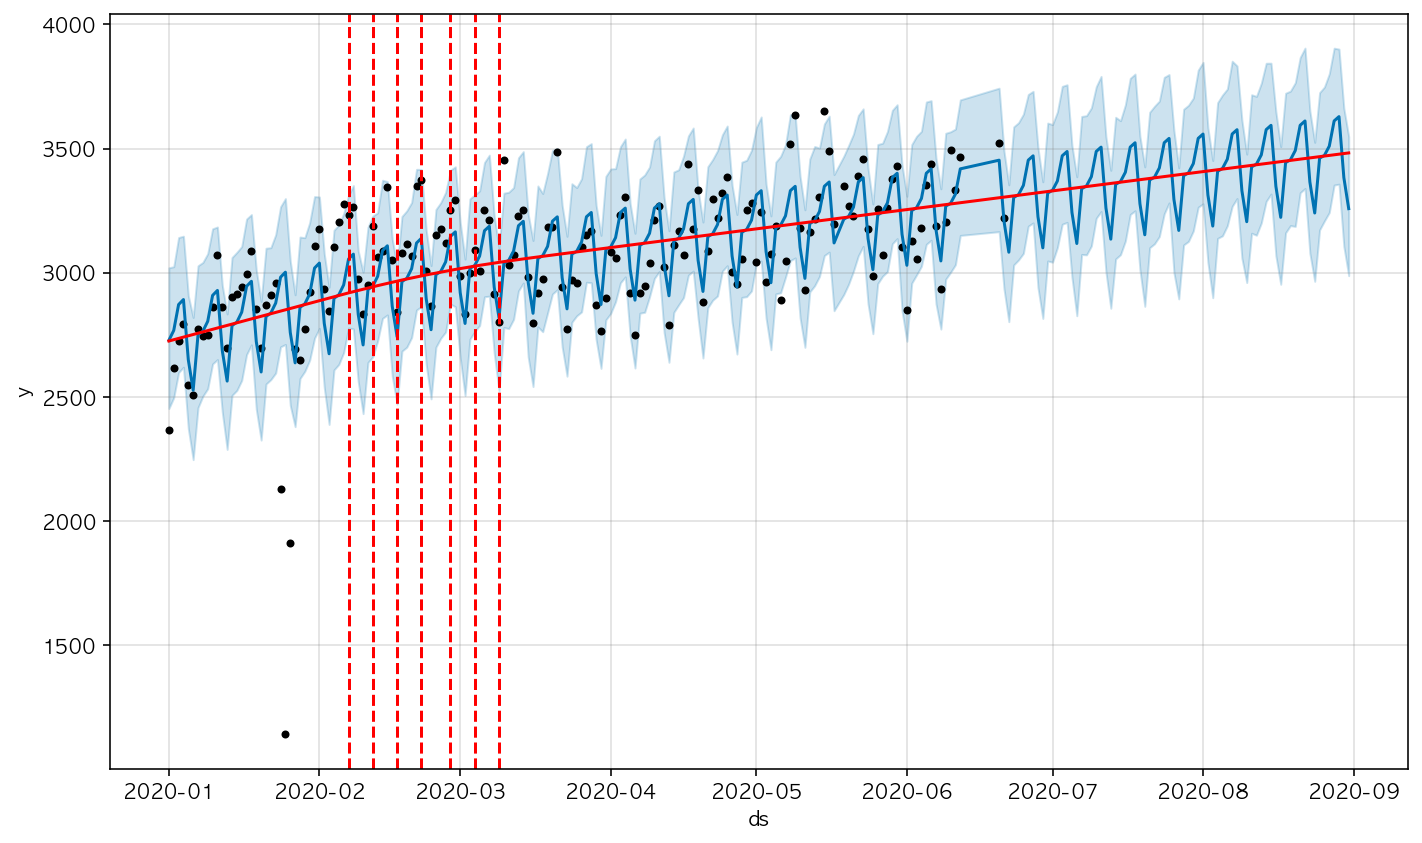

In [196]:
fig = prop.plot(forecast_store)
ax8 = add_changepoints_to_plot(fig.gca(), prop, forecast_store)
print("8월까지의 배달 서비스 제공 상점 수 예측")

- 역시 예상대로 배달 서비스 제공 점포도 계속 증가 추세를 보인다

그렇다면, 배달 건수가 더 많이 증가하였을까, 아니면 배달 서비스 제공 식당이 더 많이 증가하였을까?

> (이 경우, 동일한 날짜를 비교하는 것은 요일 특성 차이에 따른 오차가 클 것으로 판단하고, 1월과 5월의 총 합을 사용하려고 하였으나 1월에 설날이 있는 관계로 1월의 앞 3주, 5월의 앞 3주의 총 합을 사용하도록 하겠다.)

In [218]:
# 1월 앞 3주 배달 건수
jan_count = del_date.loc[0:21]["count"].sum()
# 5월 앞 3주 배달 건수
may_count = del_date.loc[121:142]["count"].sum()

# 1월 앞 3주 배달 서비스 제공 업체
jan_store = del_store.loc[0:21]["num_of_stores"].sum()
# 5월 앞 3주 배달 서비스 제공 업체
may_store = del_store.loc[121:142]["num_of_stores"].sum()


print("1월 대비 5월 배달 건수 변화량 : {}".format(round((may_count-jan_count)/jan_count*100,2)))
print("1월 대비 5월 배달 서비스 제공 점포 수 변화량 : {}".format(round((may_store-jan_store)/jan_store*100,2)))

1월 대비 5월 배달 건수 변화량 : 23.89
1월 대비 5월 배달 서비스 제공 점포 수 변화량 : 16.17


- 배달 건수의 증가량에 비해 배달 서비스 제공 점포수의 변화량이 작다는 것을 알 수 있다.
- 즉, 한 점포에서 감당해야하는 배달 주문량이 늘어났다는 사실 역시 유추할 수 있다.

#### 배달 기사 수 분석

배달 건수도 늘었고, 배달 서비스를 제공하는 점포도 늘었다.

또한, 한 점포에서 요청하는 배달 호출도 늘었다.

그렇다면 배달 기사들은 얼마나 증가하였을까?

In [237]:
del_ppl = delivery.loc[:, ["PROCESS_DT", "DLVR_MAN_ID"]]

In [238]:
del_ppl = del_ppl.groupby("PROCESS_DT")["DLVR_MAN_ID"].nunique().reset_index(name="count")
del_ppl

,PROCESS_DT,count
0,2020-01-01,1279
1,2020-01-02,1243
2,2020-01-03,1315
3,2020-01-04,1381
4,2020-01-05,1349
...,...,...
160,2020-06-10,1608
161,2020-06-11,1644
162,2020-06-12,1726
163,2020-06-20,1797


In [243]:
# 그래프로 시각화 해주기
# 일별 배달 건수 그래프
ax8 = go.Scatter(
    x = del_ppl["PROCESS_DT"],
    y = del_ppl['count'],
    name = "일별 배달 기사 수",
    mode = "lines",
    marker = dict(size=3, line=dict(width=1), color="darkgreen")
)

# subplot
fig = tools.make_subplots(rows=1, cols=1)
fig.append_trace(ax8, 1, 1)

# 그래프 설명들 추가해주기
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="배달 기사 수")

# 전체적인 layout
fig["layout"].update(height=400, width = 800, title = "일별 배달 기사 수 변화 그래프")

plotly.offline.iplot(fig)

/Users/yeonsu/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



- 배달 기사들 역시 증가하는 추세를 보이고 있다

(여기도 역시나 설날의 이상치 존재)

#### 배달 기사 수 예측

In [249]:
# prophet에 적합하도록 데이터 프레임 변형
now_ppl = del_ppl.rename(columns={"PROCESS_DT":"ds", "count" : "y"})

In [253]:
prop = Prophet(growth="linear")

In [254]:
prop.fit(now_ppl)
future_ppl = prop.make_future_dataframe(periods = 71)
future_ppl

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
231,2020-08-27
232,2020-08-28
233,2020-08-29
234,2020-08-30


In [255]:
forecast_ppl = prop.predict(future_ppl)

8월까지의 배달원 수 예측


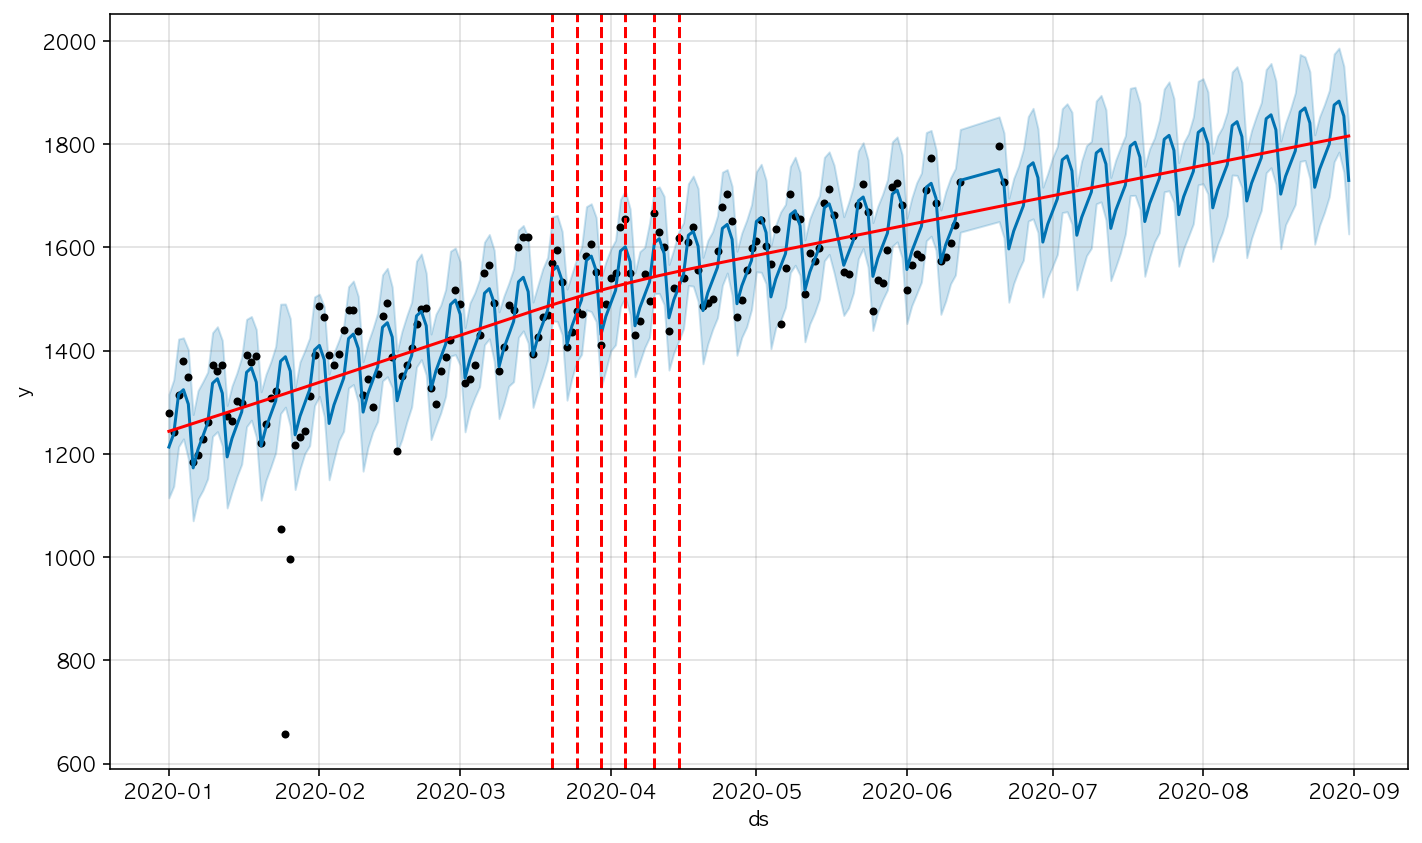

In [256]:
fig = prop.plot(forecast_ppl)
ax9 = add_changepoints_to_plot(fig.gca(), prop, forecast_ppl)
print("8월까지의 배달원 수 예측")

- 꽤나 가파른 증가세

배달 건수, 배달 서비스 제공 점포 수, 배달기사의 증감률 비교

In [257]:
# 1월 앞 3주 배달 기사 수
jan_ppl = del_ppl.loc[0:21]["count"].sum()
# 5월 앞 3주 배달 기사 수
may_ppl = del_ppl.loc[121:142]["count"].sum()

print("1월 대비 5월 배달 건수 변화량 : {}".format(round((may_count-jan_count)/jan_count*100,3)))
print("1월 대비 5월 배달 서비스 제공 점포 수 변화량 : {}".format(round((may_store-jan_store)/jan_store*100,2)))
print("1월 대비 5월 배달원 수 변화량 : {}".format(round((may_ppl-jan_ppl)/jan_ppl*100,3)))

1월 대비 5월 배달 건수 변화량 : 23.885
1월 대비 5월 배달 서비스 제공 점포 수 변화량 : 16.17
1월 대비 5월 배달원 수 변화량 : 24.203


아주 미세하지만 배달 건수보다 배달원 수가 더 많이 증가했음

- 이걸로 뽑아낼 수 있는 인사이트가 존재할까?

#### 배달 결제 방식 분석

결제 수단의 변화 역시 포스트 코로나 시대의 바뀐 소비 습관을 알아볼 수 있는 중요한 지표라고 생각한다.

현금의 경우, 실물 화폐가 필요하고 대면 결제가 필수이다.

카드의 경우 디지털을 사용하기는 하나 직접 접촉이 필요하다.

반면, 선불 결제의 경우 휴대폰과 같은 비대면 결제 방식이 가능하다.

In [259]:
del_pay = del_df.groupby(["PROCESS_DT", "SETLE_KND_VALUE"]).size().reset_index(name="count")
del_pay

,PROCESS_DT,SETLE_KND_VALUE,count
0,2020-01-01,1,9220
1,2020-01-01,2,18419
2,2020-01-01,3,3214
3,2020-01-02,1,6438
4,2020-01-02,2,12614
...,...,...,...
490,2020-06-20,2,25036
491,2020-06-20,3,3580
492,2020-06-21,1,13315
493,2020-06-21,2,27116


- SETLE_KND_VALUE 값 의미

        1 : 카드 / 2 : 선불 / 3 : 현금

In [270]:
idx1 = list(range(0,494,3))
idx2 = list(range(1,494,3))
idx3 = list(range(2,494,3))

del_pay1 = del_pay.iloc[idx1]
del_pay2 = del_pay.iloc[idx2]
del_pay3 = del_pay.iloc[idx3]

In [271]:
# 그래프로 시각화 해주기

ax9 = go.Scatter(
    x = del_pay1["PROCESS_DT"],
    y = del_pay1['count'],
    name = "카드 결제 건수",
    mode = "lines",
    marker = dict(size=3, line=dict(width=1), color="darkgreen")
)

ax10 = go.Scatter(
    x = del_pay2["PROCESS_DT"],
    y = del_pay2['count'],
    name = "선불 결제 건수",
    mode = "lines",
    marker = dict(size=3, line=dict(width=1), color="red")
)

ax11 = go.Scatter(
    x = del_pay3["PROCESS_DT"],
    y = del_pay3['count'],
    name = "현금 결제 건수",
    mode = "lines",
    marker = dict(size=3, line=dict(width=1), color="navy")
)

# subplot
fig = tools.make_subplots(rows=1, cols=1)
fig.append_trace(ax9, 1, 1)
fig.append_trace(ax10, 1, 1)
fig.append_trace(ax11, 1, 1)

# 그래프 설명들 추가해주기
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="건수")

# 전체적인 layout
fig["layout"].update(height=400, width = 800, title = "카드/선불/현금 결제 건수 변화 그래프")

plotly.offline.iplot(fig)

/Users/yeonsu/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



- 현금 결제는 미세하지만 확실한 감소 추세를 보이고 있음
- 기본적으로 선불 결제가 가장 큰 비중을 차지하고 있음
- 선불 결제의 경우 확실히 1,2,3월로 넘어가면서 증가하는 양상을 보이고 있다. => 언택트 문화
- 카드 결제의 경우 코로나가 완화된 4월 말부터 회복세를 보이다가 재난지원금이 시행된 5월 초부터 급격히 증가하는 양상을 나타낸다. (재난 지원금의 경우 선불 결제가 불가능한 경우가 많았다.)

- ~~소비를 촉진하는 정부 정책이 효과적이었을지 몰라도, 사회적 거리두기에는 오히려 방해가 되는 부분이 아니었을까..?~~

#### 업종별로 증감 추세 분석

In [281]:
# 필요한 칼럼으로 데이터 프레임 추출
columns = ["PROCESS_DT", "DLVR_STORE_INDUTY_NM"]
del_category = delivery.loc[:,columns]

In [283]:
del_category = del_category.groupby(["PROCESS_DT","DLVR_STORE_INDUTY_NM"]).size().reset_index(name="count")
del_category

,PROCESS_DT,DLVR_STORE_INDUTY_NM,count
0,2020-01-01,도시락,161
1,2020-01-01,돈까스/일식,1322
2,2020-01-01,배달전문업체,479
3,2020-01-01,분식,3553
4,2020-01-01,심부름,39
...,...,...,...
2635,2020-06-21,카페/디저트,5105
2636,2020-06-21,패스트푸드,2629
2637,2020-06-21,피자,2126
2638,2020-06-21,한식,6872


In [295]:
# 5월 11일 index를 뽑아보자
del_category[del_category["PROCESS_DT"]=="2020-05-11"].index

Int64Index([2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106,
            2107, 2108, 2109, 2110, 2111],
           dtype='int64')

In [313]:
category_ls = list(del_category.DLVR_STORE_INDUTY_NM.unique())
fig = tools.make_subplots(rows=1, cols=1)
change_df = []

for category in category_ls:
    df = del_category[del_category["DLVR_STORE_INDUTY_NM"]==category]
    df.reset_index(drop=True, inplace=True)
    ax = go.Scatter(
        x = df["PROCESS_DT"],
        y = df['count'],
        name = category,
        mode = "lines",
        marker = dict(size=3, line=dict(width=1))
)
    fig.append_trace(ax, 1, 1)
    
    # 1월 중간 2주 (화 to 화)
    jan_df = df.loc[6:20]["count"].sum()
    # 5월 중간 2주 (화 to 화)
    may_df = df.loc[132:146]["count"].sum()
    
    change_df.append({"업종": category,
                      "배달 변화량" : round((may_df-jan_df)/jan_df*100,3)})

fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="건수")
fig["layout"].update(height=600, width = 800, title = "업종별 결제 건수 변화 그래프")
plotly.offline.iplot(fig)

/Users/yeonsu/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



- 역시 치킨에서 엄청난 강세를 보임
- 대부분 증가 추세이긴하다

그렇다면 1월과 5월의 업종별 변화량을 보자

In [315]:
change_df = pd.DataFrame(change_df)
change_df.sort_values("배달 변화량")

,업종,배달 변화량
4,심부름,-22.881
0,도시락,5.500
5,아시안/양식,15.429
13,피자,16.385
6,야식,19.846
3,분식,21.591
8,중식,24.288
7,족발/보쌈,24.419
11,카페/디저트,25.138
10,치킨,25.255


- 배달 전문업체, 회 등은 워낙 절대적인 amount가 작아서 배달 변화량(%)가 크게 나오는 것 같긴하다
- 비중이 큰 것들중에는 찜탕, 한식 등이 변화량이 높은 편
- 일상적인 음식들의 배달 의존도가 높아졌다는 평가도 가능할 듯

#### 지역별로 증감 추세 분석

본 데이터로 받은 것은 서울과 대구 지역

        이걸 하면 좋을까요? 여러분들의 의견 필요 XD